In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv('city_day.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
df.shape

(29531, 16)

In [4]:
df['City'].value_counts()

Chennai               2009
Delhi                 2009
Mumbai                2009
Bengaluru             2009
Lucknow               2009
Ahmedabad             2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Kochi                  162
Ernakulam              162
Aizawl                 113
Name: City, dtype: int64

In [5]:
df['PM2.5'].isnull().value_counts()

False    24933
True      4598
Name: PM2.5, dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df['PM2.5'].describe()

count    24933.000000
mean        67.450578
std         64.661449
min          0.040000
25%         28.820000
50%         48.570000
75%         80.590000
max        949.990000
Name: PM2.5, dtype: float64

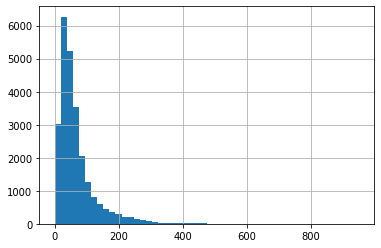

In [8]:
df['PM2.5'].hist(bins = 50)

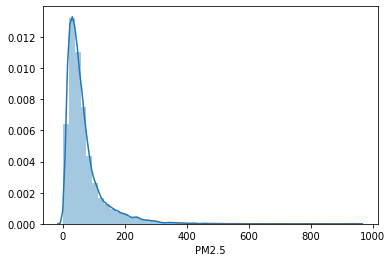

In [9]:
sns.distplot(df['PM2.5'],bins = 50)

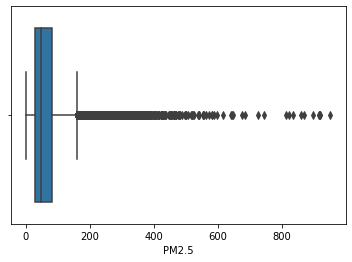

In [10]:
 sns.boxplot(df['PM2.5'] )

IT CLEARLY SHOWS THAT THERE ARE SO MANY OUTLIERS IN THIS DATA

Before Handling the outliers let us impute the values of PM2.5 of NAN values


In [11]:
df['PM2.5'].fillna(df['PM2.5'].mean() , inplace = True)

In [12]:
df['PM2.5'].isnull().sum()

0

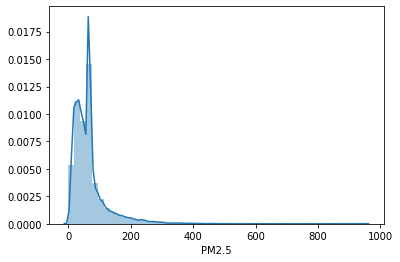

In [13]:
sns.distplot(df['PM2.5'] , bins = 50)

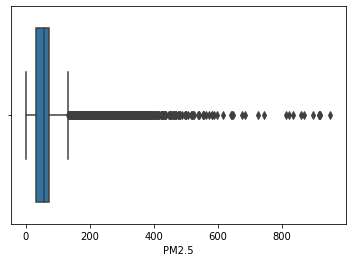

In [14]:
sns.boxplot(df['PM2.5'])

In [15]:
df['PM2.5'].describe()

count    29531.000000
mean        67.450578
std         59.414476
min          0.040000
25%         32.150000
50%         58.030000
75%         72.450000
max        949.990000
Name: PM2.5, dtype: float64

In [16]:
### Here we know that PM2.5 is a skewed data that's why we have to remove the outliers

In [17]:
IQR_PM = df['PM2.5'].quantile(0.75) - df['PM2.5'].quantile(0.25) 

In [18]:
IQR_PM

40.300000000000004

NOW FOR SKEWED DATA WE HAVE TO CALCULATE THE LOWER AND UPPER BRIDGE BASED ON DOMAIN KNOWLEDGE

In [19]:
lower_bridge_pm = df['PM2.5'].quantile(0.25) - (IQR_PM*3)
upper_bridge_pm = df['PM2.5'].quantile(0.75) + (IQR_PM*3)

In [20]:
lower_bridge_pm

-88.75

In [21]:
upper_bridge_pm

193.35000000000002

we are replacing the outlier with extreme upper bridge

In [22]:
df.loc[df['PM2.5']>=193.35 , 'PM2.5'] = 193.35 

In [23]:
df['PM2.5'].describe()

count    29531.000000
mean        64.015868
std         44.409930
min          0.040000
25%         32.150000
50%         58.030000
75%         72.450000
max        193.350000
Name: PM2.5, dtype: float64

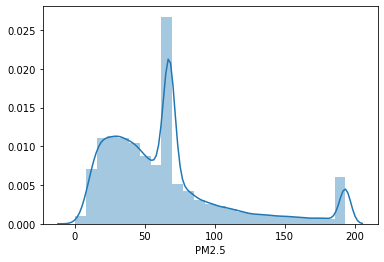

In [24]:
sns.distplot(df['PM2.5'] , bins = 25)

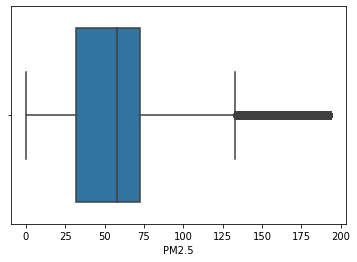

In [25]:
sns.boxplot(df['PM2.5'])

NOW FOR THE NEXT FEATURE WHICH IS PM10

In [26]:
df['PM10'].describe()

count    18391.000000
mean       118.127103
std         90.605110
min          0.010000
25%         56.255000
50%         95.680000
75%        149.745000
max       1000.000000
Name: PM10, dtype: float64

In [27]:
df['PM10'].median()

95.68

In [28]:
df['PM10'].fillna(df['PM10'].median() , inplace = True)

In [29]:
df['PM10'].describe()

count    29531.000000
mean       109.659366
std         72.324020
min          0.010000
25%         79.315000
50%         95.680000
75%        111.880000
max       1000.000000
Name: PM10, dtype: float64

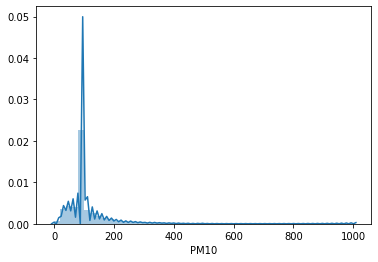

In [30]:
sns.distplot(df['PM10'] , bins =50)

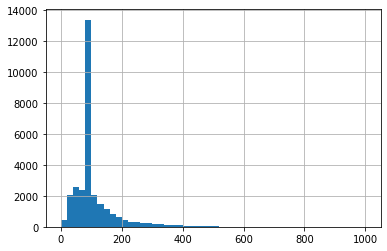

In [31]:
df['PM10'].hist(bins = 50)

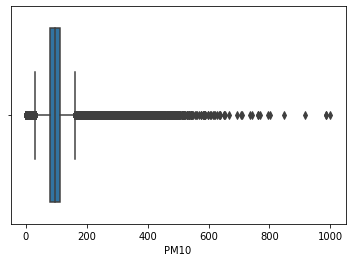

In [32]:
sns.boxplot(df['PM10'])

There are so many outliers in this also let us remove the outliers 

In [33]:
IQR_PM_TEN = df['PM10'].quantile(0.75) - df['PM10'].quantile(0.25)

In [34]:
IQR_PM_TEN

32.565

FOR ELIMINATION OF EXTREME OUTLIERS

In [35]:
lower_bridge_extreme = df['PM10'].quantile(0.25) - (IQR_PM_TEN*3)
upper_bridge_extreme = df['PM10'].quantile(0.25) + (IQR_PM_TEN*3)


In [36]:
lower_bridge_extreme

-18.379999999999995

In [37]:
upper_bridge_extreme

177.01

In [38]:
df.loc[df['PM10']>=202.885 , 'PM10'] = 202.885

In [39]:
df['PM10'].describe()

count    29531.000000
mean       101.531297
std         46.112410
min          0.010000
25%         79.315000
50%         95.680000
75%        111.880000
max        202.885000
Name: PM10, dtype: float64

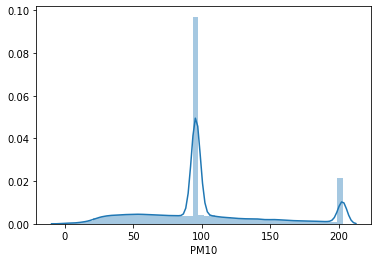

In [40]:
sns.distplot(df['PM10'])

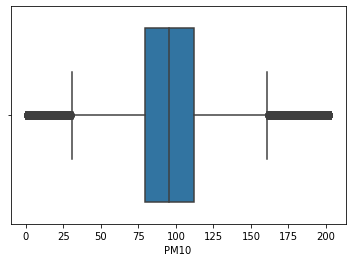

In [41]:
sns.boxplot(df['PM10'])

In [42]:
df['NO'].describe()

count    25949.000000
mean        17.574730
std         22.785846
min          0.020000
25%          5.630000
50%          9.890000
75%         19.950000
max        390.680000
Name: NO, dtype: float64

In [43]:
df['NO'].isnull().sum()

3582

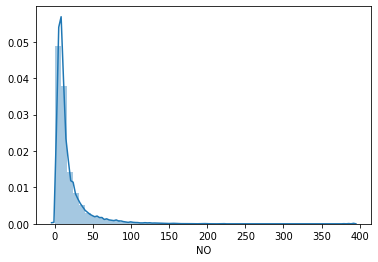

In [44]:
sns.distplot(df['NO'])

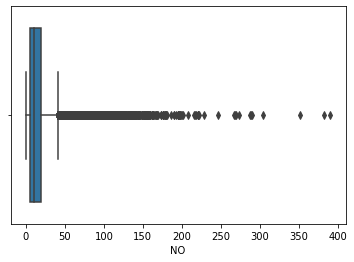

In [45]:
sns.boxplot(df['NO'])

In [46]:
df['NO'].median()

9.89

In [47]:
df['NO'].fillna(df['NO'].median() , inplace = True)

In [48]:
df['NO'].isnull().sum()

0

In [49]:
df['NO'].describe()

count    29531.000000
mean        16.642601
std         21.506064
min          0.020000
25%          6.210000
50%          9.890000
75%         17.570000
max        390.680000
Name: NO, dtype: float64

NOW AGAIN WE HAVE TO REMOVE THE OUTLIERS SINCE IT IS RIGHTLY SKEWED DATASET

In [50]:
IQR_NO = df['NO'].quantile(0.75) - df['NO'].quantile(0.25)

In [51]:
IQR_NO

11.36

In [52]:
Extreme_upper_bound = df['NO'].quantile(0.75) + (IQR_NO*3)
Extreme_lower_bound = df['NO'].quantile(0.25) - (IQR_NO*3)

In [53]:
Extreme_upper_bound

51.65

In [54]:
Extreme_lower_bound

-27.869999999999997

In [55]:
df.loc[df['NO']>= 64.03 , 'NO'] = 64.03

In [56]:
df['NO'].describe()

count    29531.000000
mean        15.283580
std         15.240933
min          0.020000
25%          6.210000
50%          9.890000
75%         17.570000
max         64.030000
Name: NO, dtype: float64

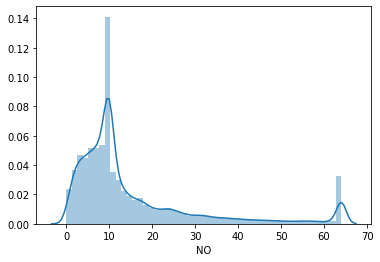

In [57]:
sns.distplot(df['NO'])

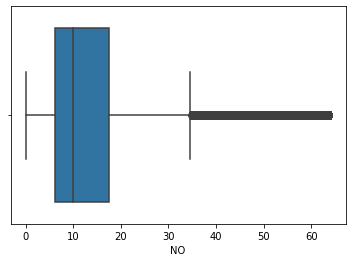

In [58]:
sns.boxplot(df['NO'])

In [59]:
df['NO2'].describe()

count    25946.000000
mean        28.560659
std         24.474746
min          0.010000
25%         11.750000
50%         21.690000
75%         37.620000
max        362.210000
Name: NO2, dtype: float64

In [60]:
df['NO2'].isnull().sum()

3585

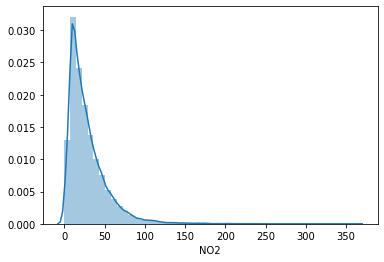

In [61]:
 sns.distplot(df['NO2'])

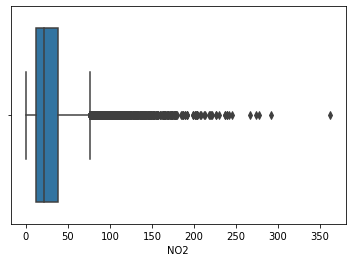

In [62]:
sns.boxplot(df['NO2'])

In [63]:
df['NO2'].median()

21.69

In [64]:
df['NO2'].fillna(df['NO2'].median() , inplace = True)

In [65]:
df['NO2'].describe()

count    29531.000000
mean        27.726576
std         23.050531
min          0.010000
25%         12.980000
50%         21.690000
75%         34.665000
max        362.210000
Name: NO2, dtype: float64

REMOVING SOME OF THE OUTLIERS

In [66]:
IQR_NO2 = df['NO2'].quantile(0.75) - df['NO2'].quantile(0.25)

In [67]:
IQR_NO2

21.685

In [68]:
UPPER_BOUND_NO2 = df['NO2'].quantile(0.75) + (IQR_NO2*3)
LOWER_BOUND_NO2 = df['NO2'].quantile(0.25) - (IQR_NO2*3)

In [69]:
UPPER_BOUND_NO2

99.72

In [70]:
LOWER_BOUND_NO2

-52.07499999999999

In [71]:
df.loc[df['NO2']>=99.72 , 'NO2'] = 99.72

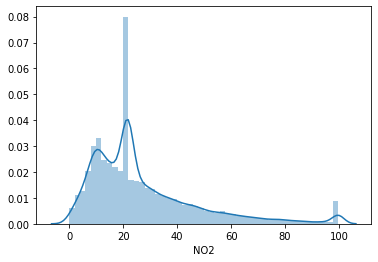

In [72]:
sns.distplot(df['NO2'])

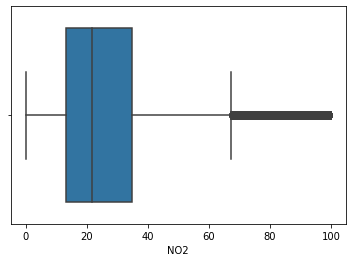

In [73]:
sns.boxplot(df['NO2'])

In [74]:
df['NOx'].describe()

count    25346.000000
mean        32.309123
std         31.646011
min          0.000000
25%         12.820000
50%         23.520000
75%         40.127500
max        467.630000
Name: NOx, dtype: float64

In [75]:
df['NOx'].isnull().value_counts()

False    25346
True      4185
Name: NOx, dtype: int64

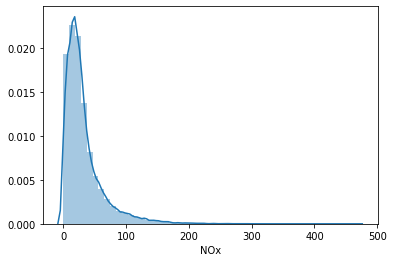

In [76]:
sns.distplot(df['NOx'])

In [77]:
df['NOx'].median()

23.52

In [78]:
df['NOx'].fillna(df['NOx'].median() , inplace = True)

In [80]:
df['NOx'].describe()

count    29531.000000
mean        31.063568
std         29.477748
min          0.000000
25%         14.670000
50%         23.520000
75%         36.015000
max        467.630000
Name: NOx, dtype: float64

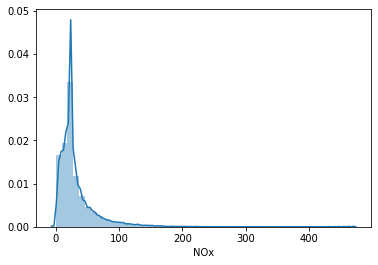

In [82]:
sns.distplot(df['NOx'])

In [83]:
IQR_NOx = df['NOx'].quantile(0.75) - df['NOx'].quantile(0.25)

In [84]:
IQR_NOx

21.345

In [85]:
upper_limit_NOx = df['NOx'].quantile(0.75)  + (IQR_NOx*3)
lower_limit_NOx = df['NOx'].quantile(0.25) - (IQR_NOx*3)

In [86]:
upper_limit_NOx

100.05

In [87]:
lower_limit_NOx

-49.364999999999995

Now for every value greater than upper limit can be considered as an outlier

In [88]:
df.loc[df['NOx']>=100.05 , 'NOx'] = 100.05

In [89]:
df['NOx'].describe()

count    29531.000000
mean        29.635190
std         23.720501
min          0.000000
25%         14.670000
50%         23.520000
75%         36.015000
max        100.050000
Name: NOx, dtype: float64

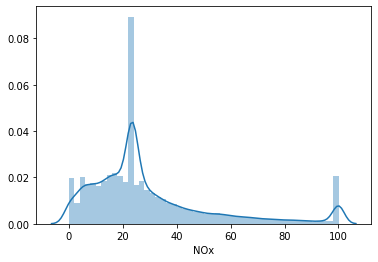

In [90]:
sns.distplot(df['NOx'])

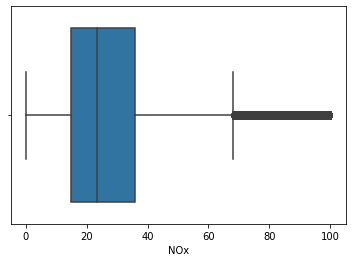

In [91]:
sns.boxplot(df['NOx'])

In [92]:
df['NH3'].describe()

count    19203.000000
mean        23.483476
std         25.684275
min          0.010000
25%          8.580000
50%         15.850000
75%         30.020000
max        352.890000
Name: NH3, dtype: float64

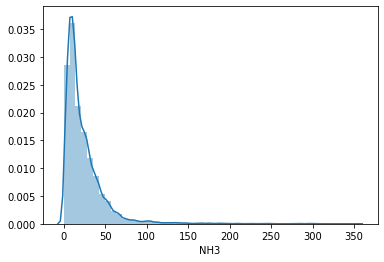

In [94]:
sns.distplot(df['NH3'])

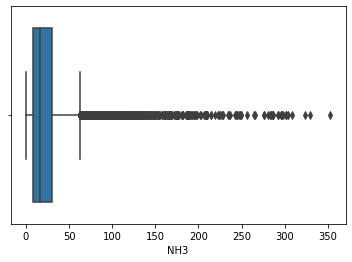

In [95]:
sns.boxplot(df['NH3'])

AS there are so many outliers visible from boxplot

In [97]:
df['NH3'].isnull().value_counts()

False    19203
True     10328
Name: NH3, dtype: int64

In [98]:
df['NH3'].median()

15.85

In [99]:
df['NH3'].fillna(df['NH3'].median() , inplace = True)

In [100]:
df['NH3'].describe()

count    29531.000000
mean        20.813789
std         21.028862
min          0.010000
25%         12.040000
50%         15.850000
75%         21.755000
max        352.890000
Name: NH3, dtype: float64

REMOVING SOME OUTLIERS 

In [101]:
IQR_NH3 =  df['NH3'].quantile(0.75) - df['NH3'].quantile(0.25)

In [102]:
IQR_NH3

9.715000000000003

In [103]:
Upper_limit_NH3 = df['NH3'].quantile(0.75) + (IQR_NH3*3)
Lower_limit_NH3 = df['NH3'].quantile(0.25) - (IQR_NH3*3)

In [104]:
Upper_limit_NH3

50.90000000000001

In [105]:
Lower_limit_NH3

-17.10500000000001

In [107]:
df.loc[df['NH3']>= 50.9 , 'NH3'] = 50.9

In [108]:
df['NH3'].describe()

count    29531.000000
mean        18.938206
std         12.307343
min          0.010000
25%         12.040000
50%         15.850000
75%         21.755000
max         50.900000
Name: NH3, dtype: float64

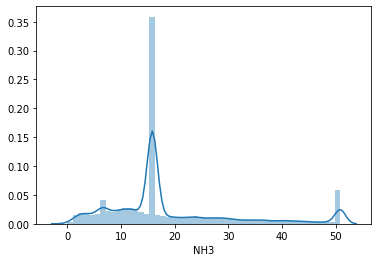

In [109]:
sns.distplot(df['NH3'])

In [110]:
df['CO'].describe()

count    27472.000000
mean         2.248598
std          6.962884
min          0.000000
25%          0.510000
50%          0.890000
75%          1.450000
max        175.810000
Name: CO, dtype: float64

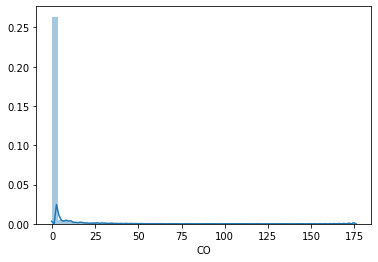

In [111]:
sns.distplot(df['CO'])

In [112]:
df['CO'].isnull().value_counts()

False    27472
True      2059
Name: CO, dtype: int64

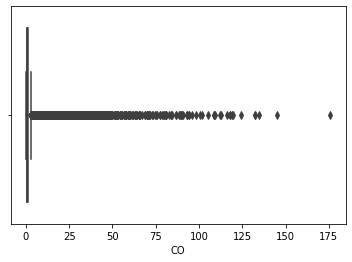

In [113]:
sns.boxplot(df['CO'])

In [114]:
df['CO'].median()

0.89

In [115]:
df['CO'].fillna(df['CO'].median() , inplace = True)

In [116]:
df['CO'].describe()

count    29531.000000
mean         2.153872
std          6.724660
min          0.000000
25%          0.540000
50%          0.890000
75%          1.380000
max        175.810000
Name: CO, dtype: float64

REMOVING SOME OUTLIERS

In [118]:
IQR_CO = df['CO'].quantile(0.75) - df['CO'].quantile(0.25)

In [119]:
IQR_CO

0.8399999999999999

In [120]:
Upper_limit_CO = df['CO'].quantile(0.75) + (IQR_CO*3)
Lower_limit_CO = df['CO'].quantile(0.25) - (IQR_CO*3)

In [121]:
Upper_limit_CO

3.8999999999999995

In [122]:
Lower_limit_CO

-1.9799999999999995

In [123]:
df.loc[df['CO']>= 3.89 , 'CO'] = 3.89

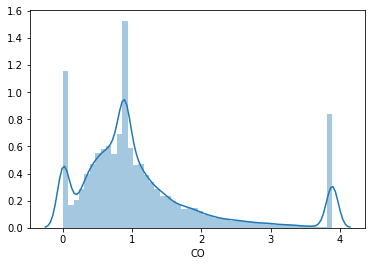

In [124]:
sns.distplot(df['CO'])

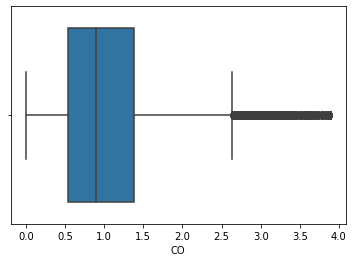

In [125]:
sns.boxplot(df['CO'])

In [126]:
df['SO2'].describe()

count    25677.000000
mean        14.531977
std         18.133775
min          0.010000
25%          5.670000
50%          9.160000
75%         15.220000
max        193.860000
Name: SO2, dtype: float64

In [127]:
df['SO2'].isnull().value_counts()

False    25677
True      3854
Name: SO2, dtype: int64

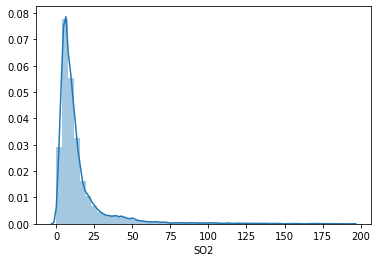

In [128]:
sns.distplot(df['SO2'])

In [129]:
df['SO2'].median()

9.16

In [130]:
df['SO2'].fillna(df['SO2'].median() , inplace = True)

In [131]:
df['SO2'].describe()

count    29531.000000
mean        13.830897
std         17.005647
min          0.010000
25%          6.090000
50%          9.160000
75%         13.810000
max        193.860000
Name: SO2, dtype: float64

In [132]:
IQR_SO2 = df.SO2.quantile(0.75) - df.SO2.quantile(0.25)

In [133]:
IQR_SO2

7.720000000000001

In [134]:
upper_limit_SO2 = df['SO2'].quantile(0.75) + (IQR_SO2*3)
lower_limit_SO2 = df['SO2'].quantile(0.25) - (IQR_SO2*3)

In [135]:
upper_limit_SO2

36.970000000000006

In [136]:
lower_limit_SO2

-17.070000000000004

In [137]:
df.loc[df['SO2']>= 36.97 , 'SO2'] = 36.97

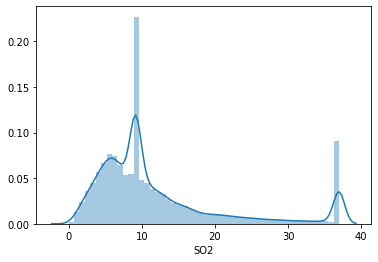

In [138]:
sns.distplot(df['SO2'])

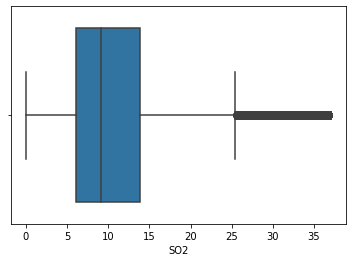

In [139]:
sns.boxplot(df['SO2'])

In [140]:
df['O3'].describe()

count    25509.000000
mean        34.491430
std         21.694928
min          0.010000
25%         18.860000
50%         30.840000
75%         45.570000
max        257.730000
Name: O3, dtype: float64

In [141]:
df['O3'].isnull().value_counts()

False    25509
True      4022
Name: O3, dtype: int64

In [142]:
df['O3'].median()

30.84

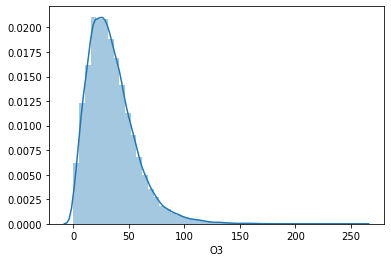

In [143]:
sns.distplot(df['O3'])

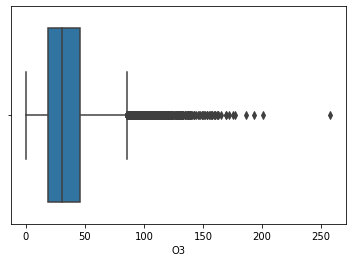

In [144]:
sns.boxplot(df['O3'])

In [145]:
df['O3'].fillna(df['O3'].median() , inplace = True)

In [146]:
df['O3'].describe()

count    29531.000000
mean        33.994121
std         20.202304
min          0.010000
25%         20.740000
50%         30.840000
75%         42.730000
max        257.730000
Name: O3, dtype: float64

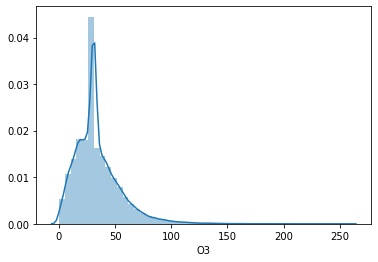

In [147]:
sns.distplot(df['O3'])

In [148]:
IQR_O3 = df['O3'].quantile(0.75) - df['O3'].quantile(0.25)

In [149]:
IQR_O3

21.99

In [150]:
Upper_limit_O3 = df['O3'].quantile(0.75)  + (IQR_O3*3)
Lower_limit_O3 = df['O3'].quantile(0.25) - (IQR_O3*3)

In [151]:
Upper_limit_O3

108.69999999999999

In [152]:
Lower_limit_O3

-45.230000000000004

In [153]:
df.loc[df['O3']>=108.69,'O3'] = 108.69

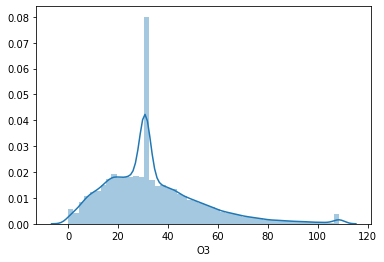

In [154]:
sns.distplot(df['O3'])

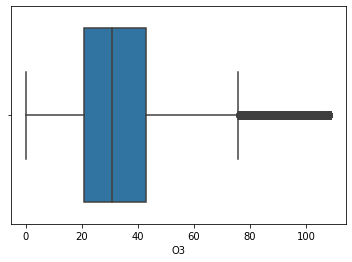

In [155]:
sns.boxplot(df['O3'])

In [156]:
df['Benzene'].describe()

count    23908.000000
mean         3.280840
std         15.811136
min          0.000000
25%          0.120000
50%          1.070000
75%          3.080000
max        455.030000
Name: Benzene, dtype: float64

In [157]:
df['Benzene'].isnull().value_counts()

False    23908
True      5623
Name: Benzene, dtype: int64

In [158]:
df['Benzene'].median()

1.07

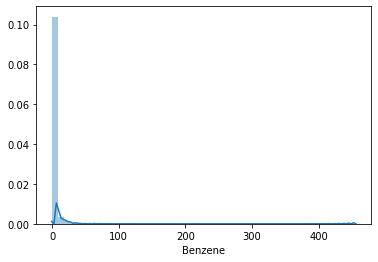

In [159]:
sns.distplot(df['Benzene'])

In [160]:
df['Benzene'].fillna(df['Benzene'].median() , inplace = True)

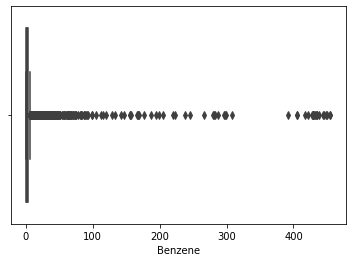

In [163]:
sns.boxplot(df['Benzene'])

In [164]:
IQR_BENZENE = df['Benzene'].quantile(0.75) - df['Benzene'].quantile(0.25)

In [165]:
IQR_BENZENE

2.1799999999999997

In [167]:
Upper_bound_Benzene = df['Benzene'].quantile(0.75) + (IQR_BENZENE*3)
Lower_bound_Benzene = df['Benzene'].quantile(0.25) - (IQR_BENZENE*3)

In [168]:
Upper_bound_Benzene

8.959999999999999

In [169]:
Lower_bound_Benzene

-6.299999999999999

In [170]:
df.loc[df['Benzene']>= 8.95 , 'Benzene'] = 8.95

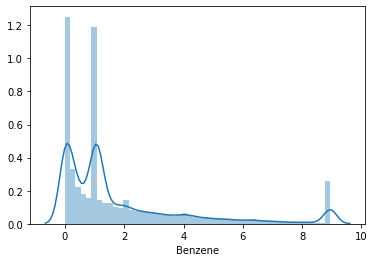

In [171]:
sns.distplot(df['Benzene'])

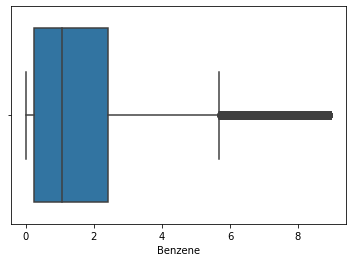

In [172]:
sns.boxplot(df['Benzene'])

In [173]:
df['Toluene'].describe()

count    21490.000000
mean         8.700972
std         19.969164
min          0.000000
25%          0.600000
50%          2.970000
75%          9.150000
max        454.850000
Name: Toluene, dtype: float64

In [174]:
df['Toluene'].isnull().value_counts()

False    21490
True      8041
Name: Toluene, dtype: int64

IMPUTING NULL VALUES

In [175]:
df['Toluene'].median()

2.97

In [176]:
df['Toluene'].fillna(df['Toluene'].median() , inplace = True)

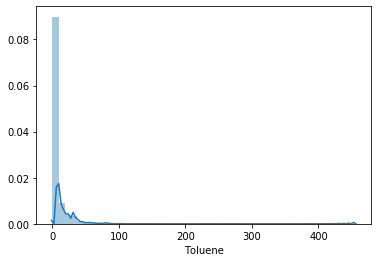

In [177]:
sns.distplot(df['Toluene'])

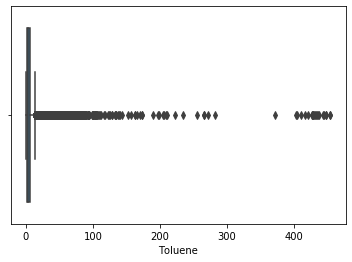

In [178]:
sns.boxplot(df['Toluene'])

REMOVING OUTLIERS

In [180]:
IQR_TOLUENE = df['Toluene'].quantile(0.75) - df['Toluene'].quantile(0.25)

In [181]:
IQR_TOLUENE

4.739999999999999

In [182]:
upper_limit_toluene = df['Toluene'].quantile(0.75) + (IQR_TOLUENE*3)
lower_limit_toluene = df['Toluene'].quantile(0.25) - (IQR_TOLUENE*3)

In [183]:
upper_limit_toluene

20.24

In [184]:
lower_limit_toluene

-12.94

In [185]:
df.loc[df['Toluene']>=20.24,'Toluene'] = 20.24

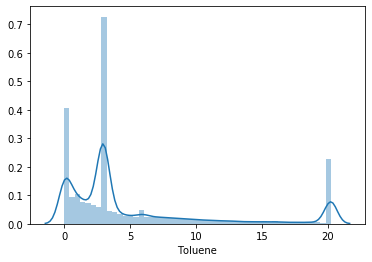

In [186]:
sns.distplot(df['Toluene'])

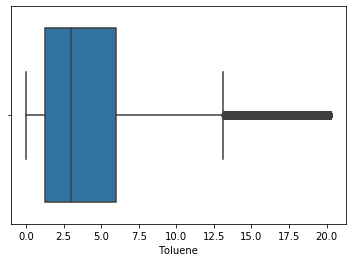

In [187]:
sns.boxplot(df['Toluene'])

In [188]:
df['Xylene'].describe()

count    11422.000000
mean         3.070128
std          6.323247
min          0.000000
25%          0.140000
50%          0.980000
75%          3.350000
max        170.370000
Name: Xylene, dtype: float64

In [189]:
df['Xylene'].isnull().value_counts()

True     18109
False    11422
Name: Xylene, dtype: int64

In [190]:
df['Xylene'].median()

0.98

In [191]:
df['Xylene'].fillna(df['Xylene'].median(), inplace = True)

In [196]:
df['Xylene'].describe()

count    29531.000000
mean         1.788420
std          4.062039
min          0.000000
25%          0.980000
50%          0.980000
75%          0.980000
max        170.370000
Name: Xylene, dtype: float64

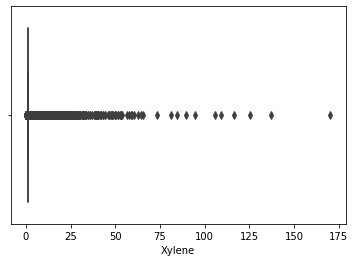

In [193]:
sns.boxplot(df['Xylene'])

REMOVING MANY OUTLIERS

In [194]:
IQR_TOLUENE = df['Xylene'].quantile(0.75) - df['Xylene'].quantile(0.25)

In [195]:
IQR_TOLUENE

0.0

THERE ARE SO MANY NAN VALUES WHICH ARE AND SO MANY OUTLIERS

In [197]:
df.drop('Xylene',axis = 1 , inplace = True)

In [198]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.450578,95.68,0.92,18.22,17.15,15.85,0.92,27.64,108.69,0.00,0.02,NaN,NaN
1,Ahmedabad,2015-01-02,67.450578,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,NaN,NaN
2,Ahmedabad,2015-01-03,67.450578,95.68,17.40,19.30,29.70,15.85,3.89,29.07,30.70,6.80,16.40,NaN,NaN
3,Ahmedabad,2015-01-04,67.450578,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,NaN,NaN
4,Ahmedabad,2015-01-05,67.450578,95.68,22.10,21.42,37.76,15.85,3.89,36.97,39.31,7.01,18.89,NaN,NaN


In [199]:
df['AQI'].describe()

count    24850.000000
mean       166.463581
std        140.696585
min         13.000000
25%         81.000000
50%        118.000000
75%        208.000000
max       2049.000000
Name: AQI, dtype: float64

In [200]:
df['AQI'].isnull().value_counts()

False    24850
True      4681
Name: AQI, dtype: int64

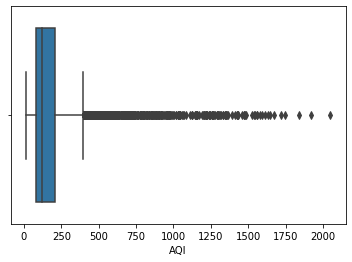

In [201]:
sns.boxplot(df['AQI'])

In [202]:
df['AQI'].median()

118.0

In [203]:
df['AQI'].fillna(df['AQI'].median(), inplace = True)

In [207]:
df['AQI'].describe()

count    29531.000000
mean       158.781552
std        130.272413
min         13.000000
25%         88.000000
50%        118.000000
75%        179.000000
max       2049.000000
Name: AQI, dtype: float64

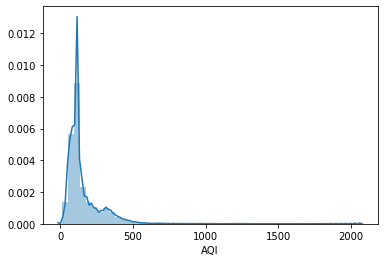

In [204]:
sns.distplot(df['AQI'])

In [205]:
IQR_AQI = df['AQI'].quantile(0.75) - df['AQI'].quantile(0.25)

In [206]:
IQR_AQI

91.0

In [208]:
upper_limit_AQI = df['AQI'].quantile(0.75) + (IQR_AQI*3)
lower_limit_AQI = df['AQI'].quantile(0.25) - (IQR_AQI*3)

In [209]:
upper_limit_AQI

452.0

In [210]:
lower_limit_AQI

-185.0

In [211]:
df.loc[df['AQI']>=452.0 , 'AQI'] = 452.0

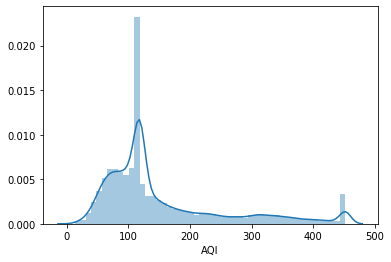

In [212]:
sns.distplot(df['AQI'])

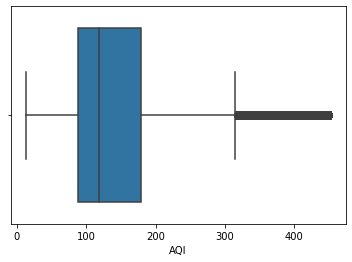

In [214]:
sns.boxplot(df['AQI'])